# Estimación del volumen para una mezcla iónica AlCl₃/EMIC con ratio 1.3

Queremos preparar una muestra pequeña de líquido iónico compuesta por AlCl₃ y EMIC (1-etil-3-metilimidazolio cloruro), con una **relación molar de AlCl₃/EMIC = 1.3**.

---

## Paso 1: Elección del número de moléculas

Para mantener el número total de **átomos** por debajo de 100, tomamos un número pequeño de moléculas de EMIC:

$$
n_{\mathrm{EMIC}} = 4
$$

Con el ratio molar de 1.3, calculamos el número de moléculas de AlCl₃:

$$
n_{\mathrm{AlCl_3}} = 4 \times 1.3 = 5.2 \approx 5
$$

---

## Paso 2: Cálculo del volumen ocupado por molécula

Datos importantes:

- Masa molar de EMIC:  
  $$
  M_{\mathrm{EMIC}} \approx 146.62\ \mathrm{g/mol}
  $$

- Densidad de EMIC:  
  $$
  \rho_{\mathrm{EMIC}} \approx 1.435\ \mathrm{g/cm^3}
  $$

- Masa molar de AlCl₃:  
  $$
  M_{\mathrm{AlCl_3}} \approx 133.34\ \mathrm{g/mol}
  $$

- Densidad de AlCl₃:  
  $$
  \rho_{\mathrm{AlCl_3}} \approx 2.44\ \mathrm{g/cm^3}
  $$

Número de Avogadro:

$$
N_A = 6.022 \times 10^{23}
$$

Fórmula para el volumen de una molécula:

$$
V = \frac{M}{\rho \cdot N_A}
$$

- **EMIC**:

$$
V_{\text{EMIC}} = \frac{146.62}{1.435 \cdot 6.022 \times 10^{23}} \approx 1.70 \times 10^{-22}\ \text{cm}^3
$$

- **AlCl₃**:

$$
V_{\text{AlCl₃}} = \frac{133.34}{2.44 \cdot 6.022 \times 10^{23}} \approx 9.11 \times 10^{-23}\ \text{cm}^3
$$

---

## Paso 3: Volumen total de la mezcla

- **EMIC**:

$$
V_{\text{total, EMIC}} = 4 \cdot 1.70 \times 10^{-22} = 6.8 \times 10^{-22}\ \text{cm}^3
$$

- **AlCl₃**:

$$
V_{\text{total, AlCl₃}} = 5 \cdot 9.11 \times 10^{-23} \approx 4.56 \times 10^{-22}\ \text{cm}^3
$$

- **Volumen total de la mezcla**:

$$
V_{\text{total}} = 6.8 \times 10^{-22} + 4.56 \times 10^{-22} = 1.136 \times 10^{-21}\ \text{cm}^3
$$

---

## Paso 4: Conversión a Ångstrom cúbico

Sabemos que:

$$
1\ \text{cm}^3 = 10^{24}\ \text{Å}^3
$$

Entonces:

$$
V_{\text{total}} = 1.136 \times 10^{-21} \cdot 10^{24} = 1136\ \text{Å}^3
$$

Tamaño de la caja cúbica:

$$
L = \sqrt[3]{1136} \approx 10.4\ \text{Å}
$$

---

## Resultado Final

Para una simulación con 4 moléculas de EMIC y 5 de AlCl₃:

- Número total de moléculas: **9**  
- Volumen estimado:  
  $$
  \boxed{1136\ \mathrm{Å}^3}
  $$
- Tamaño de la caja cúbica:  
  $$
  \boxed{10.4\ \mathrm{Å} \times 10.4\ \mathrm{Å} \times 10.4\ \mathrm{Å}}
  $$

Este volumen puede usarse en Packmol para generar una configuración inicial razonable para simulación.


AlCl3 

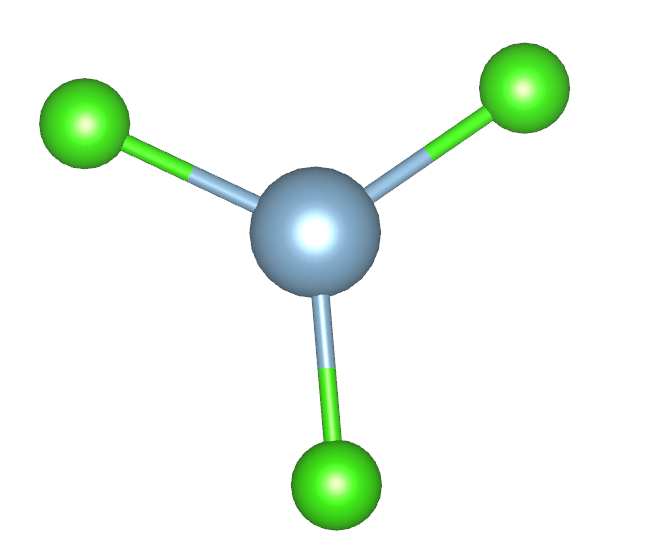
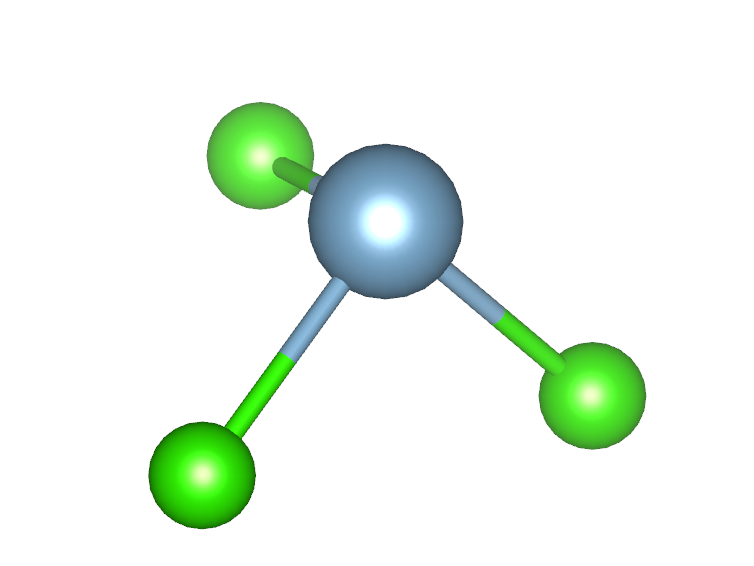

EMIC

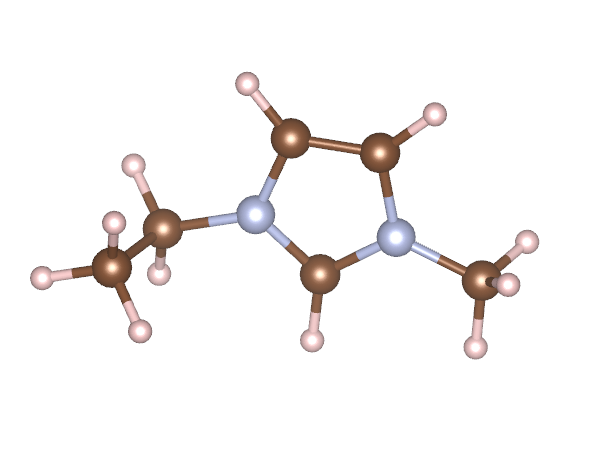
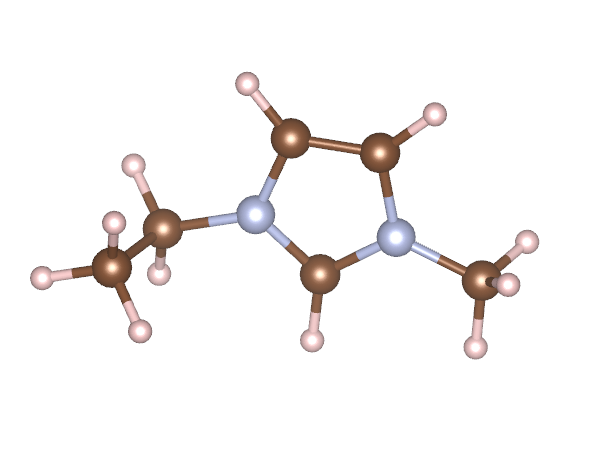

Mezcla 

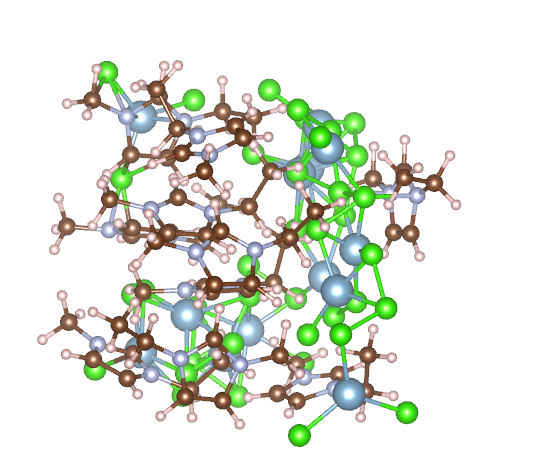
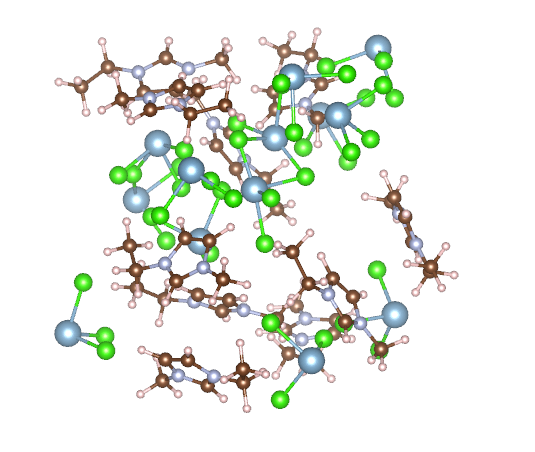

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.SDMolSupplier('EMIC_3D.sdf')[0]
mol = Chem.AddHs(mol)   # Agrega hidrógenos explícitos
AllChem.EmbedMolecule(mol)

with open("EMIC_3D.xyz", "w") as f:
    atoms = mol.GetAtoms()
    conf = mol.GetConformer()
    f.write(f"{len(atoms)}\n\n")
    for atom in atoms:
        pos = conf.GetAtomPosition(atom.GetIdx())
        f.write(f"{atom.GetSymbol()} {pos.x:.5f} {pos.y:.5f} {pos.z:.5f}\n")


In [4]:
from rdkit import Chem

# Cargar molécula desde SDF (primer molécula del archivo)
mol = Chem.SDMolSupplier('EMIC_3D.sdf', removeHs=False)[0]

# Obtener el primer conformer (coordenadas originales)
conf = mol.GetConformer()

with open("EMIC_3D.xyz", "w") as f:
    atoms = mol.GetAtoms()
    f.write(f"{len(atoms)}\n\n")
    for atom in atoms:
        pos = conf.GetAtomPosition(atom.GetIdx())
        f.write(f"{atom.GetSymbol()} {pos.x:.6f} {pos.y:.6f} {pos.z:.6f}\n")


In [4]:
from ase import io
import sys

from ase import io

# Especifica directamente el nombre del archivo
filename = 'AlCl3.xyz'

# Leer y mostrar la estructura
atoms = io.read(filename)
print(atoms)


# Mostrar información sobre los átomos y sus posiciones
print("Átomos:")
print(atoms.get_chemical_symbols())
print("Posiciones (en Å):")
print(atoms.get_positions())


Atoms(symbols='Cl3Al', pbc=False)
Átomos:
['Cl', 'Cl', 'Cl', 'Al']
Posiciones (en Å):
[[ 0.9669 -0.0794 -0.0312]
 [ 4.2832  1.6421  0.8069]
 [ 4.2832 -1.8009 -0.8694]
 [ 3.1778 -0.0794 -0.0312]]
